In [1]:
import sys
sys.path.append("/home/marin/projects/mhac/build")
import mhac

In [2]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_TSP_data(filepath="../data/tsp/eil101.tsp"):
    cities = mhac.physics.examples.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1] # NAME
        FileType = infile.readline().strip().split()[1] # TYPE
        Comment = infile.readline().strip().split()[1] # COMMENT
        Dimension = infile.readline().strip().split(":")[1] # DIMENSION
        EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.physics.examples.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [4]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

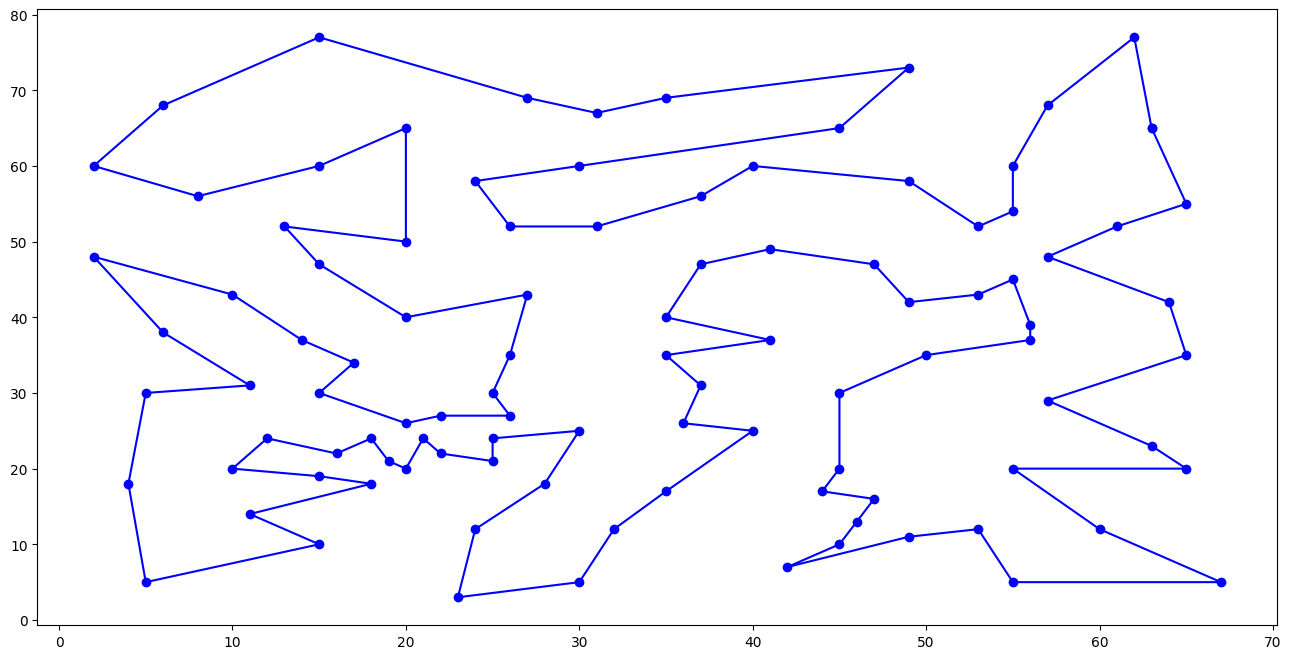

In [6]:
problem = mhac.physics.examples.TSP(read_TSP_data())
SA = mhac.physics.SimulatedAnnealing(problem)

SA.solve(1000., 0.000001)

displayTour(problem.mCities, SA.getSolution().tour)

In [ ]:
class PythonTSP(mhac.physics.Problem):
    def __init__(self, cities: mhac.physics.Cities):
        super().__init__()
        self.cities = cities

    def generateInitialSolution(self):
        return random.sample(self.cities.size(), self.cities.size())
    
    def generateNewSolution(self, intialSolution):
        i, j = random.sample(range(self.N),2)
        if i > j: i,j=j,i
        new_S = intialSolution.copy()
        for k in range((j-i)//2):
            new_S[i+k],new_S[j-k]=new_S[j-k],new_S[i+k]
        return new_S
    
    def evaluateSolution(self, solution):
        val = 0
        for i in range(self.N-1):
            val += self.cities[solution[i]].distance(self.cities[solution[i+1]])
        val += self.cities[solution[0]].distance(self.cities[solution[self.N-1]])
        return val

In [ ]:
problem = PythonTSP(read_TSP_data())
# SA = mhac.physics.SimulatedAnnealing(problem)

# SA.solve(1000., 0.000001)

# displayTour(problem.mCities, SA.getSolution())

# TODO: work on 'trampolines' 

TypeError: PythonTSP: No constructor defined!